In [ ]:
%matplotlib inline
import math
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import linalg
from scipy import stats
from IPython.display import HTML, display

plt.rcdefaults()
# plt.xkcd(scale=1, length=300, randomness=5)

# A
## Link
https://www.kaggle.com/mohamadalhasan/a-fake-news-dataset-around-the-syrian-war

In [ ]:
fake_news = pd.read_csv("data/Fake_News.csv", encoding="iso8859-1")
fake_news.head(5)

,unit_id,article_title,article_content,source,date,location,labels
0,1914947530,Syria attack symptoms consistent with nerve ag...,Wed 05 Apr 2017 Syria attack symptoms consiste...,nna,4/5/2017,idlib,0
1,1914947532,Homs governor says U.S. attack caused deaths b...,Fri 07 Apr 2017 at 0914 Homs governor says U.S...,nna,4/7/2017,homs,0
2,1914947533,Death toll from Aleppo bomb attack at least 112,Sun 16 Apr 2017 Death toll from Aleppo bomb at...,nna,4/16/2017,aleppo,0
3,1914947534,Aleppo bomb blast kills six Syrian state TV,Wed 19 Apr 2017 Aleppo bomb blast kills six Sy...,nna,4/19/2017,aleppo,0
4,1914947535,29 Syria Rebels Dead in Fighting for Key Alepp...,Sun 10 Jul 2016 29 Syria Rebels Dead in Fighti...,nna,7/10/2016,aleppo,0


In [ ]:
for fake_news_attributes in fake_news:
    unique_values =  len(pd.unique(fake_news[fake_news_attributes]))
    print(fake_news_attributes, ":", unique_values)

unit_id : 792
article_title : 774
article_content : 789
source : 15
date : 423
location : 12
labels : 2


## Description
This dataset has a label class, either 0 or 1. It has 7 attributes: unit_id, article_title, article_content, source, date, location, labels. The article_title, article_content are text data. According to the counter above, both of them have 700+ unique data instances in their class.

## Task and objectives
Since this assignment focuses on probability and linearity in language and text data, only two attributes will be used: article_content as text data and labels for classification. The analysis will include class distribution and probabilities, term probabilities and Zipf's Law, Text vectorization, classification using naive bayes model, linear model and non-linear methods.

# B
## B.1

|Class $c$|Instances $n_c$|Probability $p(c)$|
|-|-|-|
|unit_id|792|792/2807=0.2822|
|article_title|774|774/2807=0.2757|
|article_content|789|789/2807=0.2811|
|source|15|15/2807=0.0053|
|Date|423|423/2807=0.1507|
|location|12|12/2807=0.0043|
|labels|2|2/2807=0.0007|

## B.2
### B.2.1

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(analyzer="word")
X = vect.fit_transform(fake_news.article_content) 
terms = vect.get_feature_names()
freqs = X.toarray().sum(axis=0)
terms = np.array(terms)
freqs = np.array(freqs)

tfs = pd.DataFrame({'t':terms, 'f':freqs}, columns=['t','f'])

In [ ]:
tfs = tfs.sort_values(by=['f'], ascending=False)
tfs = tfs.reset_index(drop=True)
tfs.head()

,t,f
0,the,17395
1,in,8606
2,of,8094
3,and,6308
4,to,4260


In [ ]:
tfs['k'] = tfs.index + 1
tfs[['t','k','f']].head()

,t,k,f
0,the,1,17395
1,in,2,8606
2,of,3,8094
3,and,4,6308
4,to,5,4260


In [ ]:
ttf = tfs['f'].sum()
tfs['p'] = tfs['f'] / ttf
tfs[['t','k','p']].head()

,t,k,p
0,the,1,0.070148
1,in,2,0.034705
2,of,3,0.032641
3,and,4,0.025438
4,to,5,0.017179


### B.2.2

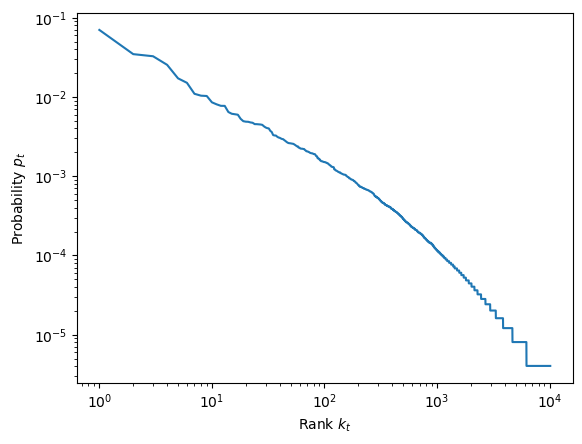

In [ ]:
plt.loglog(tfs['k'], tfs['p'])
plt.xlabel('Rank $k_t$')
plt.ylabel('Probability $p_t$')
plt.show()

### B.2.3

In [ ]:
from sklearn.linear_model import LinearRegression

x = tfs['k'].values.reshape(-1,1)
xlog = np.log(x)
y = tfs['p'].values.reshape(-1,1)
ylog = np.log(y)

lm = LinearRegression()
lm.fit(xlog,ylog)
lm.coef_

array([[-1.44461486]])

1. The coefficient is -1.44461486, it means $ p_t \propto \frac {1} {(k_t)^{1.44461486}} $
2. Plot

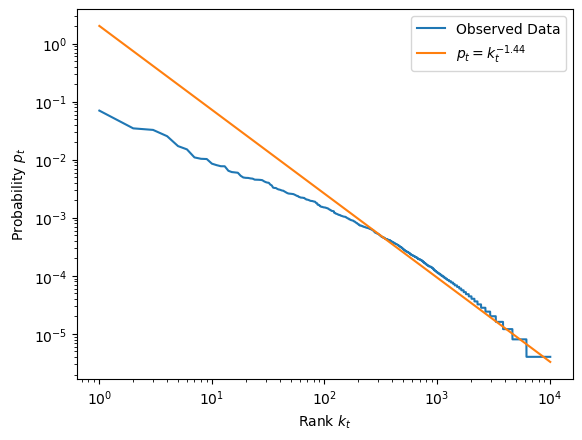

In [ ]:
yplog = lm.predict(xlog)
plt.loglog(tfs['k'], tfs['p'], label="Observed Data")
plt.loglog(x, np.exp(yplog), 
           label="$p_t = k_t^{" + "{:.2f}".format(lm.coef_[0][0]) + "}$")
plt.xlabel('Rank $k_t$')
plt.ylabel('Probability $p_t$')
plt.legend()
plt.show()

3. Yes, it fit Zipf's law. The lines are roughly fitted, and the formula is exactly as the Zipf's law which is $p_t= \frac {1} {k_t}$.

# C
## C.1

In [ ]:
train_index = np.random.rand(len(fake_news)) < 0.8
train = fake_news[train_index]
test = fake_news[~train_index]

## C.2
1.

In [ ]:
vect = CountVectorizer(analyzer="word")
X_train = vect.fit_transform(train.article_content)

2.

In [ ]:
terms = vect.get_feature_names()
t1 = "fake"
i1 = terms.index(t1)
print("The {:d}th term is: {:s}".format(i1, t1))
t2= "news"
i2 = terms.index(t2)
print("The {:d}th term is: {:s}".format(i2, t2))

The 3267th term is: fake
The 5724th term is: news


3.

In [ ]:
X_test = vect.transform(test.article_content)

## C.3
1.

In [ ]:
zero_index = train['labels']==0
zero = train[zero_index]
one = train[~zero_index]
X_zero = vect.transform(zero.article_content)
X_one = vect.transform(one.article_content)
X_zero.shape
X_one.shape

(344, 9231)

In [ ]:
zerof = X_zero.toarray().sum(axis=0)
zerottf = zerof.sum()
f = zerof[i1]
p = f / zerottf
ps = (f+1)/(zerottf+2)
print("p({:s}|zero) = {:.7f}, smoothed to {:.7f}".format(t1, p, ps))

p(fake|zero) = 0.0000000, smoothed to 0.0000110


In [ ]:
onef = X_one.toarray().sum(axis=0)
onettf = onef.sum()
f = onef[i1]
p = f / onettf
ps = (f+1)/(onettf+2)
print("p({:s}|one) = {:.7f}, smoothed to {:.7f}".format(t1, p, ps))

p(fake|one) = 0.0000092, smoothed to 0.0000183


In [ ]:
zerof = X_zero.toarray().sum(axis=0)
zerottf = zerof.sum()
f = zerof[i2]
p = f / zerottf
ps = (f+1)/(zerottf+2)
print("p({:s}|zero) = {:.7f}, smoothed to {:.7f}".format(t2, p, ps))

p(news|zero) = 0.0011080, smoothed to 0.0011189


In [ ]:
onef = X_one.toarray().sum(axis=0)
onettf = onef.sum()
f = onef[i2]
p = f / onettf
ps = (f+1)/(onettf+2)
print("p({:s}|one) = {:.7f}, smoothed to {:.7f}".format(t2, p, ps))

p(news|one) = 0.0013098, smoothed to 0.0013189


\begin{eqnarray}
p(fake|zero) & = & 0.0000000 \\
p(fake|one) & = & 0.0000092 \\
p(news|zero)& = & 0.0011080 \\
p(news|one) & = & 0.0013098 \\
\end{eqnarray}

1. The word "fake" is unlikely to appear in fake news article content labeled 0, it is more likely to see "fake" in article content labeled 1. The word "news" has similar probabilities appear in article content, and it is more likely to appear in article content labeled 1 than article content labeled 0.
2. Yes, because p(fake|zero) and p(fake|one) has low probability, and it makes sense that fake news tries to avoid the word "fake". Since article content is news data, the term "news" are expected to appear in the article content, which fits the probability values of p(news|zero) and p(news|one).
3. Yes, these data form the basis of the Naive Bayes model and can be used in Linear Model, as well as provide an initial observation.

# D
## D.1
1.

In [ ]:
from sklearn.naive_bayes import BernoulliNB

bNB = BernoulliNB(alpha=.01, binarize=0.0)
bNB.fit(X_train, train.labels)

BernoulliNB(alpha=0.01)

2.

In [ ]:
labelsp = bNB.predict(X_test)
print(labelsp)

[1 0 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1
 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0
 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0]


3.

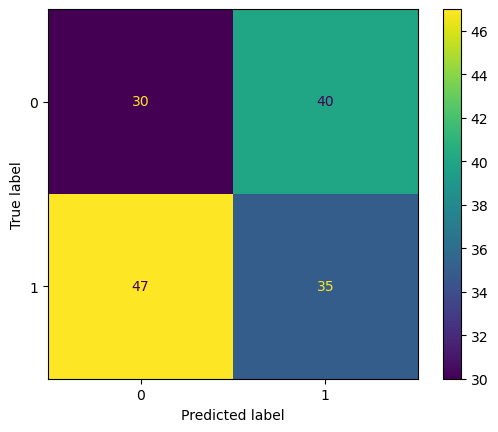

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

confusion_matrix(labelsp, test.labels)
display(plot_confusion_matrix(bNB, X_test, test.labels, values_format='d'))

4. In the confusion matrix, the (0,0) and (1,1) are the two most important values that need to be maximized because they represent the prediction and actual test values. The larger the number is, the better accuracy the test has. With the same reason, the (0,0) and (1,1) needs to be minimized.
5. The F1 score, which is F measure, shows the accuracy of the test. Unlike accuracy_score, it calculates both precision and recall value. Therefore, the F1 score is a good metric to determine the accuracy in a balanced way.

In [ ]:
from sklearn.metrics import accuracy_score, cohen_kappa_score 

acc = accuracy_score(labelsp, test.labels)
kappa = cohen_kappa_score(labelsp, test.labels)

print("Accuracy: {:.4f}".format(acc))
print("Kappa   : {:.4f}".format(kappa))

from sklearn.metrics import f1_score

f1 = f1_score(labelsp, test.labels)
print("F1   : {:.4f}".format(f1))

Accuracy: 0.4276
Kappa   : -0.1435
F1   : 0.4459


6.

In [ ]:
from sklearn.naive_bayes import BernoulliNB

bNB = BernoulliNB(alpha=1, binarize=0.0)
bNB.fit(X_train, train.labels)

BernoulliNB(alpha=1)

In [ ]:
labelsp = bNB.predict(X_test)
print(labelsp)

[1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1
 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0
 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0]


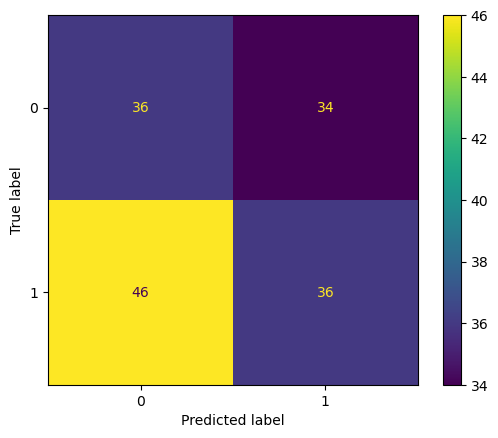

In [ ]:
confusion_matrix(labelsp, test.labels)
display(plot_confusion_matrix(bNB, X_test, test.labels, values_format='d'))

Discuss, for your task and objectives, which number(s) in the confusion matrix is most important, that you wish to minimize or maximize? Why?

In [ ]:
acc = accuracy_score(labelsp, test.labels)
kappa = cohen_kappa_score(labelsp, test.labels)
f1 = f1_score(labelsp, test.labels)

print("Accuracy: {:.4f}".format(acc))
print("Kappa   : {:.4f}".format(kappa))
print("F1   : {:.4f}".format(f1))

Accuracy: 0.4737
Kappa   : -0.0461
F1   : 0.4737


|Model|Accuracy|Kappa|F1|
|-|-|-|-|
|Naive Bayes, $\alpha 1$ = 0.01|0.4276|-0.1435|0.4459|
|Naive Bayes, $\alpha 2$ = 1|0.4737|-0.0461|0.4737|

## D.2
### D.2.1
1.

In [ ]:
t1 = terms.index("fake")
t2 = terms.index("news")
t1, t2

(3267, 5724)

2.

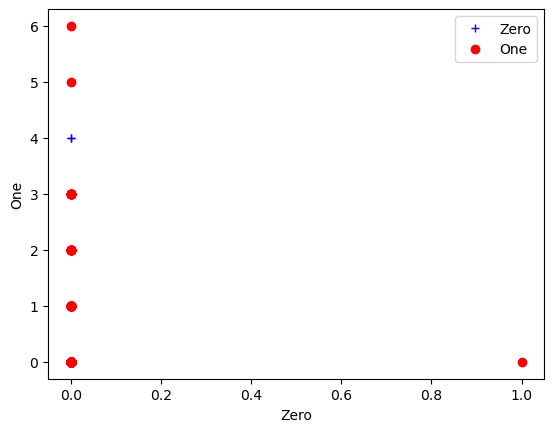

In [ ]:
plt.plot(X_zero.toarray()[:,t1], X_zero.toarray()[:,t2], '+', color="blue", label="Zero")
plt.plot(X_one.toarray()[:,t1], X_one.toarray()[:,t2], 'o', color="red", label="One")
plt.xlabel("Zero")
plt.ylabel("One")
plt.legend()

3. The two classes are not separable on the plot, and they are not linearly separable on the plot.

### D2.2
1. Perceptron 
2. 

In [ ]:
from sklearn.linear_model import Perceptron

net1 = Perceptron(max_iter=50, eta0=0.15, random_state=0)
net1.fit(X_train, train.labels)

Perceptron(eta0=0.15, max_iter=50)

In [ ]:
labelsp = net1.predict(X_test)
print(labelsp)

[0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0
 0 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1
 0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1
 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 0
 1 0 1 1]


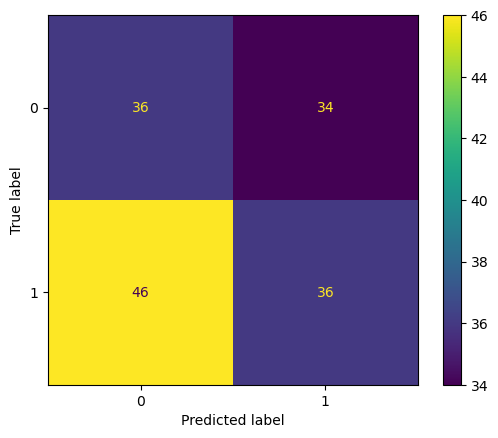

In [ ]:
confusion_matrix(labelsp, test.labels)
display(plot_confusion_matrix(bNB, X_test, test.labels, values_format='d'))

In [ ]:
acc = accuracy_score(labelsp, test.labels)
kappa = cohen_kappa_score(labelsp, test.labels)
f1 = f1_score(labelsp, test.labels)

print("Accuracy: {:.4f}".format(acc))
print("Kappa   : {:.4f}".format(kappa))
print("F1   : {:.4f}".format(f1))

Accuracy: 0.5197
Kappa   : 0.0324
F1   : 0.5576


3. 

In [ ]:
net1 = Perceptron(max_iter=1000, eta0=1, random_state=0)
net1.fit(X_train, train.labels)

Perceptron(eta0=1)

In [ ]:
labelsp = net1.predict(X_test)
print(labelsp)

[0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0
 0 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1
 0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1
 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 0
 1 0 1 1]


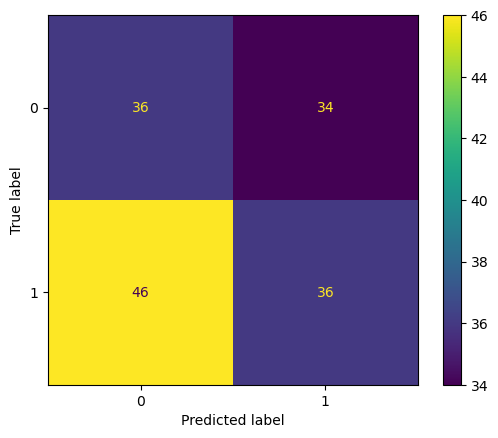

In [ ]:
confusion_matrix(labelsp, test.labels)
display(plot_confusion_matrix(bNB, X_test, test.labels, values_format='d'))

In [ ]:
acc = accuracy_score(labelsp, test.labels)
kappa = cohen_kappa_score(labelsp, test.labels)
f1 = f1_score(labelsp, test.labels)

print("Accuracy: {:.4f}".format(acc))
print("Kappa   : {:.4f}".format(kappa))
print("F1   : {:.4f}".format(f1))

Accuracy: 0.5197
Kappa   : 0.0324
F1   : 0.5576


3. 

|Model|Accuracy|Kappa|F1|
|-|-|-|-|
|Linear model, max_iter=50, eta0=0.5|0.5197|0.0324|0.5576|
|Linear model, max_iter=1000, eta0=1|0.5197|0.0324|0.5576|

## D.3
Non-linear Multi-layer Perceptron: sklearn.neural_network.MLPClassifier

In [ ]:
from sklearn.neural_network import MLPClassifier

net2 = MLPClassifier(hidden_layer_sizes=(2), activation='logistic', solver='lbfgs', max_iter=500)
net2.fit(X_train, train.labels)

MLPClassifier(activation='logistic', hidden_layer_sizes=2, max_iter=500,
              solver='lbfgs')

In [ ]:
labelsp = net2.predict(X_test)
print(labelsp)

[0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1
 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0
 1 0 1 1]


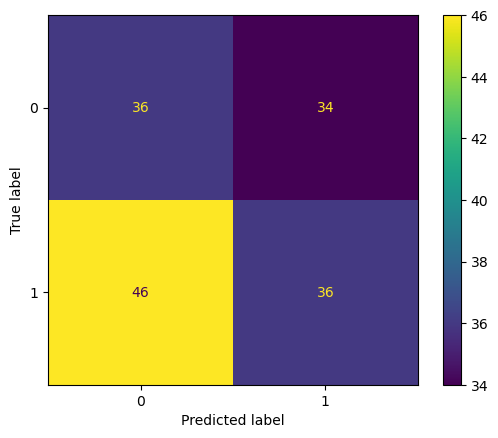

In [ ]:
confusion_matrix(labelsp, test.labels)
display(plot_confusion_matrix(bNB, X_test, test.labels, values_format='d'))

In [ ]:
acc = accuracy_score(labelsp, test.labels)
kappa = cohen_kappa_score(labelsp, test.labels)
f1 = f1_score(labelsp, test.labels)

print("Accuracy: {:.4f}".format(acc))
print("Kappa   : {:.4f}".format(kappa))
print("F1   : {:.4f}".format(f1))

Accuracy: 0.5461
Kappa   : 0.0835
F1   : 0.5868


In [ ]:
net2 = MLPClassifier(hidden_layer_sizes=(2), activation='logistic', solver='lbfgs', max_iter=1000)
net2.fit(X_train, train.labels)

MLPClassifier(activation='logistic', hidden_layer_sizes=2, max_iter=1000,
              solver='lbfgs')

In [ ]:
labelsp = net2.predict(X_test)
print(labelsp)

[1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0
 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1
 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0
 0 1 1 1]


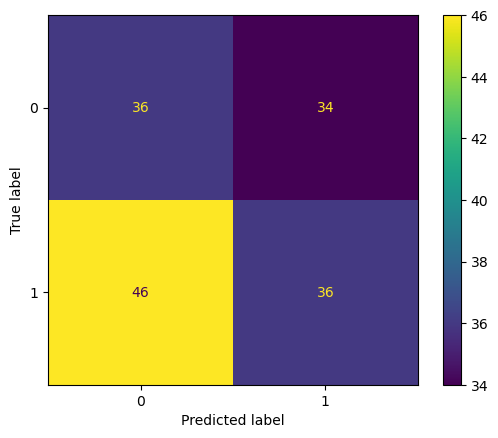

In [ ]:
confusion_matrix(labelsp, test.labels)
display(plot_confusion_matrix(bNB, X_test, test.labels, values_format='d'))

In [ ]:
acc = accuracy_score(labelsp, test.labels)
kappa = cohen_kappa_score(labelsp, test.labels)
f1 = f1_score(labelsp, test.labels)

print("Accuracy: {:.4f}".format(acc))
print("Kappa   : {:.4f}".format(kappa))
print("F1   : {:.4f}".format(f1))

Accuracy: 0.5329
Kappa   : 0.0510
F1   : 0.5896


|Model|Accuracy|Kappa|F1|
|-|-|-|-|
|MLPClassifier, hidden_layer_sizes=(2), activation='logistic', solver='lbfgs', max_iter=500|0.5461|0.0835|0.5868|
|MLPClassifier,hidden_layer_sizes=(2), activation='logistic', solver='lbfgs', max_iter=1000|0.5329|0.0510|0.5896|

# E

|Model|Accuracy|Kappa|F1|
|-|-|-|-|
|Naive Bayes, $\alpha 1$ = 0.01|0.4276|-0.1435|0.4459|
|Naive Bayes, $\alpha 2$ = 1|0.4737|-0.0461|0.4737|
|Linear model, max_iter=50, eta0=0.5|0.5197|0.0324|0.5576|
|Linear model, max_iter=1000, eta0=1|0.5197|0.0324|0.5576|
|MLPClassifier, hidden_layer_sizes=(2), activation='logistic', solver='lbfgs', max_iter=500|0.5461|0.0835|0.5868|
|MLPClassifier,hidden_layer_sizes=(2), activation='logistic', solver='lbfgs', max_iter=1000|0.5329|0.0510|0.5896|

The two terms used for classification tasks and objectives are "fake" and "news", while the class "labels" in origin data label them with either "0" or "1". Based on these choices, Naive Bayes model, Linear model and Non-linear Multi-layer Perceptron model are used for classification tasks.

So far, the Non-linear Multi-layer Perceptron has the best results. It is because the data are not separable on plot and not linearly separable based on observation. In addition, the Linear model has no performance change with parameter modification. 

In the future, when working on the data, determining the shape of data will be the first priority. If data is not separable or linearly separable, data processing may be required for using a linear classification model. Otherwise, it has to use a non-linear classification model and other alternatives.

A. Data Preparation (1 / 1 point)

B. Probabilities and Zipf
+ B.1. Class Distributions and Probabilities (0.5 / 0.5 point)
+ B.2. Term Probabilities and Zipf's Law (2 / 2.5 points)

Based on the plot, it is not an exact fit and the fitted line is p = k^{-1.44}, different from zipf's k^{-1}.

C. Text Vectorization
+ C.1. Training and Test Data (0.5 / 0.5 point)
+ C.2. Text Vectorization (0.5 / 0.5 point)
+ C.3. Terms and Conditional Probabilities (1 / 1 point)

D. Classification
+ D.1. Probabilistic Naive Bayes Model (2 / 2 points)
+ D.2. Linear Model (1.5 / 2 points)

Please directly address the question of linearity.
There is overlap of data points from the two classes, and hence they are not (linearly) separable on the two dimensions.


+ D.3 Non-linear Classification or Alternative (1 / 1 points)

E. Conclusion (1 / 1 point)

Nice work!